In [1]:
ptm = Sys.time()

library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [9]:
library(data.table)
library(Matrix)

In [3]:
meta = read.table(
    file = '/data/estorrs/mushroom/data/projects/submission_v1/HT206B1/cellchat/HT206B1-U1/meta.txt',
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
colnames(meta) = c('labels', 'samples')
head(meta)

,labels,samples
,<chr>,<chr>
aaaagokl-1,Cancer cells,sample
aaaaippd-1,Cancer cells,sample
aaaajeja-1,Cancer cells,sample
aaablpen-1,Cancer cells,sample
aaaclnhj-1,Cancer cells,sample
aaadfacg-1,Cancer cells,sample


In [13]:
data_input = read.table(
    file = '/data/estorrs/mushroom/data/projects/submission_v1/HT206B1/cellchat/HT206B1-U1/expression.txt',
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
head(data_input)

,ABCC11,ACAN,ACE2,ACKR1,ACTA2,ACTG2,ADAM28,ADAMTS1,ADGRE1,ADGRL4,⋯,UCHL1,UMOD,UPK3B,VCAN,VEGFA,VIM,VPREB1,VSIG4,VWA5A,VWF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aaaagokl-1,0,0,0,0,0,0.00000,0,0,0.0000000,0.0000000,⋯,0,0,1.582409,0.0000000,0.000000,0.0000000,0,0,0.0000000,0
aaaaippd-1,0,0,0,0,0,0.00000,0,0,0.0000000,0.0000000,⋯,0,0,0.000000,0.0000000,1.179401,0.0000000,0,0,0.0000000,0
aaaajeja-1,0,0,0,0,0,1.11024,0,0,0.0000000,0.0000000,⋯,0,0,0.000000,0.0000000,0.000000,1.1102403,0,0,0.0000000,0
aaablpen-1,0,0,0,0,0,0.00000,0,0,0.0000000,0.0000000,⋯,0,0,0.000000,0.0000000,0.000000,0.0000000,0,0,0.0000000,0
aaaclnhj-1,0,0,0,0,0,0.00000,0,0,0.9388531,0.5757836,⋯,0,0,0.000000,0.5757836,2.080280,0.5757836,0,0,0.0000000,0
aaadfacg-1,0,0,0,0,0,0.00000,0,0,0.0000000,0.5250103,⋯,0,0,0.000000,0.0000000,0.000000,0.5250103,0,0,0.5250103,0


In [14]:
ids = rownames(data_input)
genes = colnames(data_input)
data_input = transpose(data_input)
data_input = data.matrix(data_input)
rownames(data_input) = genes
colnames(data_input) = ids
head(data_input)

,aaaagokl-1,aaaaippd-1,aaaajeja-1,aaablpen-1,aaaclnhj-1,aaadfacg-1,aaadjdmd-1,aaaecoli-1,aaaeolhd-1,aaafbdae-1,⋯,oikbedha-1,oikblhjp-1,oikboiko-1,oikccamh-1,oikccdjd-1,oikcfelo-1,oikcgcbk-1,oikdmjki-1,oikecdga-1,oikeepjh-1
ABCC11,0,0,0.00000,0,0,0,0.0000000,0,0,0,⋯,0.0000000,0.0000000,0,0.000000,0,0.000000,0,0.0000000,0.000000,0
ACAN,0,0,0.00000,0,0,0,0.0000000,0,0,0,⋯,0.0000000,0.0000000,0,0.000000,0,0.000000,0,0.0000000,0.000000,0
ACE2,0,0,0.00000,0,0,0,0.0000000,0,0,0,⋯,0.0000000,0.0000000,0,0.000000,0,0.000000,0,0.0000000,0.000000,0
ACKR1,0,0,0.00000,0,0,0,0.0000000,0,0,0,⋯,0.0000000,0.0000000,0,0.000000,0,0.000000,0,0.0000000,0.000000,0
ACTA2,0,0,0.00000,0,0,0,0.0000000,0,0,0,⋯,0.9457177,0.0000000,0,0.000000,0,0.000000,0,0.0000000,0.000000,0
ACTG2,0,0,1.11024,0,0,0,0.7647768,0,0,0,⋯,0.7177294,0.9347853,0,1.399366,0,1.729884,0,0.5671065,1.461932,0


In [15]:
coordinates = read.table(
    file = '/data/estorrs/mushroom/data/projects/submission_v1/HT206B1/cellchat/HT206B1-U1/coordinates.txt',
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
colnames(coordinates) = c('imagecol', 'imagerow')
head(coordinates)

,imagecol,imagerow
,<int>,<int>
aaaagokl-1,1441,871
aaaaippd-1,1468,860
aaaajeja-1,1411,855
aaablpen-1,1449,858
aaaclnhj-1,1441,844
aaadfacg-1,1458,841


In [16]:
spatial_factors = data.frame(ratio = 1., tol = 10.)

In [17]:
cellchat <- createCellChat(object = data_input, meta = meta, group.by = "labels",
                           datatype = "spatial", coordinates = coordinates, spatial.factors = spatial_factors)

[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in createCellChat(object = data_input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor!”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Adipocytes, B-cells, Cancer cells, CD4 T cells, CD8 T cells, Endothelial, Fibroblasts, Macrophages, Mast cells, mregDC, Myoepitelial/Normal ducts, NK cells, pDC, Plasma cells, Treg 


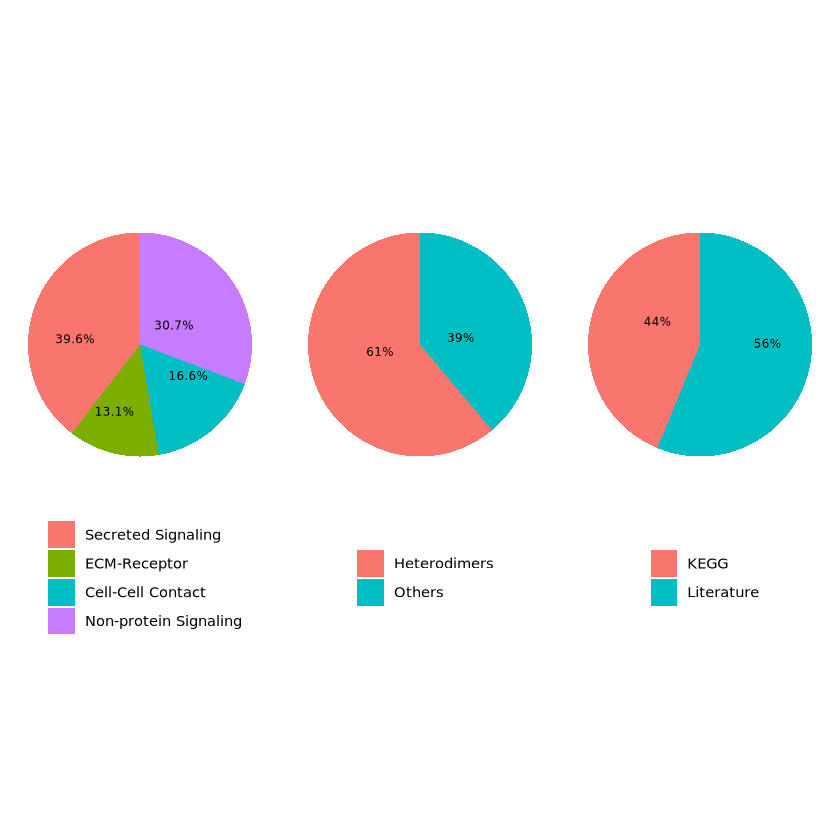

In [18]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)

In [19]:
dplyr::glimpse(CellChatDB$interaction)

Rows: 3,234
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [32]:
# CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation") # use Secreted Signaling
CellChatDB.use <- subsetDB(CellChatDB)
# CellChatDB.use <- subsetDB(CellChatDB, key = "annotation")

In [33]:
cellchat@DB <- CellChatDB.use

In [34]:
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database

In [37]:
future::plan("multisession", workers = 4) 
cellchat <- identifyOverExpressedGenes(cellchat, do.fast = FALSE)
cellchat <- identifyOverExpressedInteractions(cellchat, variable.both = F)

The number of highly variable ligand-receptor pairs used for signaling inference is 26 


In [42]:
# cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
#                               distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
#                               contact.dependent = TRUE, contact.range = 10)
cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
                              distance.use = TRUE, interaction.range = 250, scale.distance = 6.8,
                              contact.dependent = TRUE, contact.range = 10)
# cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
#                               distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
#                               contact.dependent = FALSE)

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-04-24 20:27:52.711646]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-04-24 20:29:07.922732]"


In [43]:
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [44]:
cellchat <- computeCommunProbPathway(cellchat)

In [45]:
cellchat <- aggregateNet(cellchat)

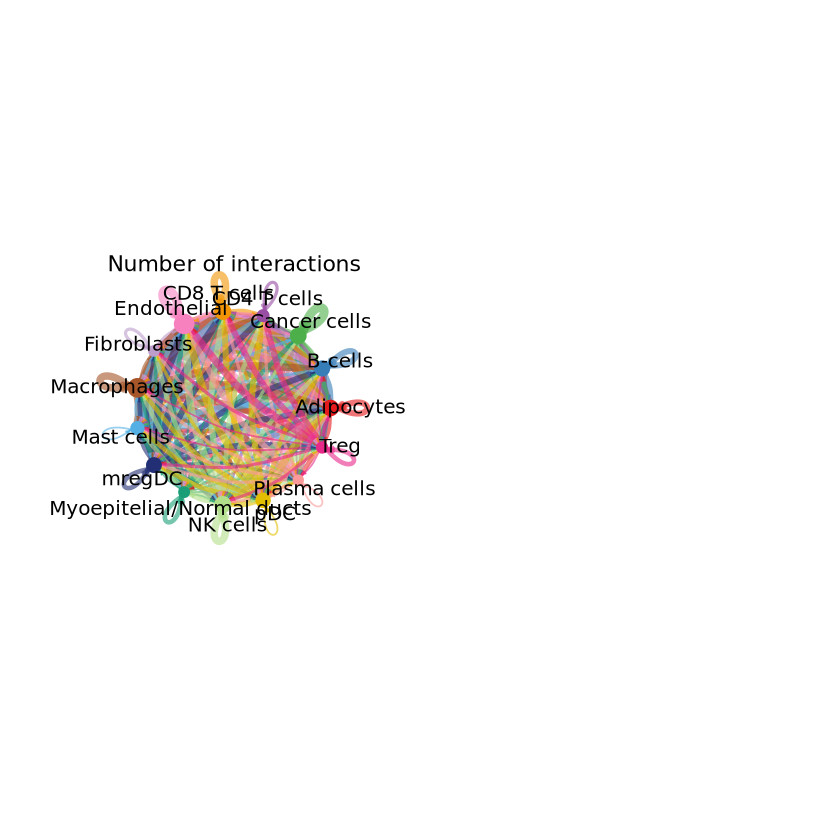

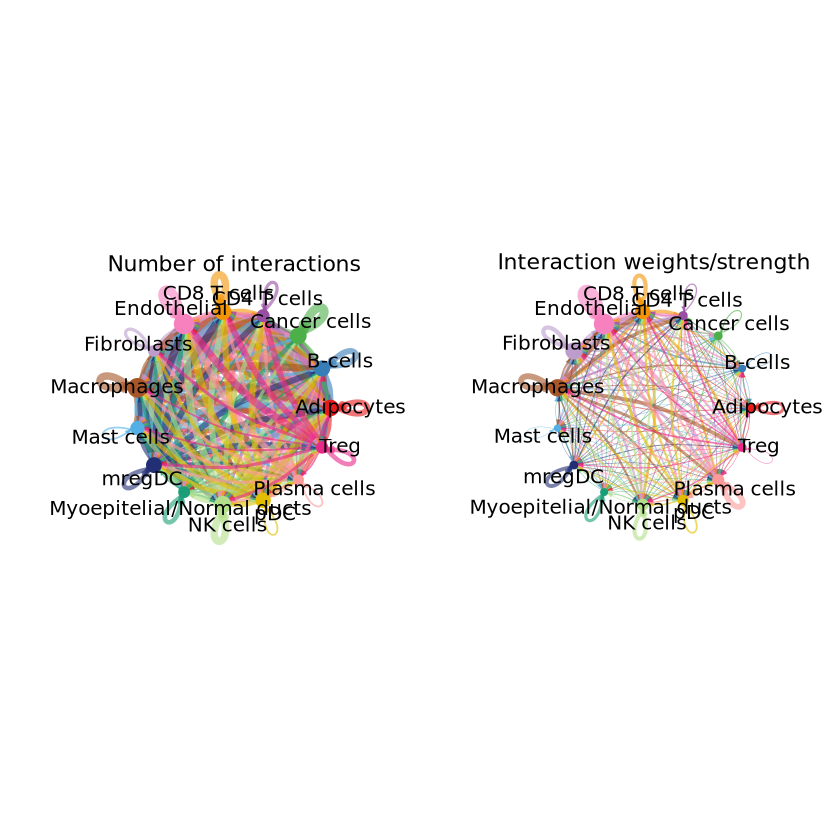

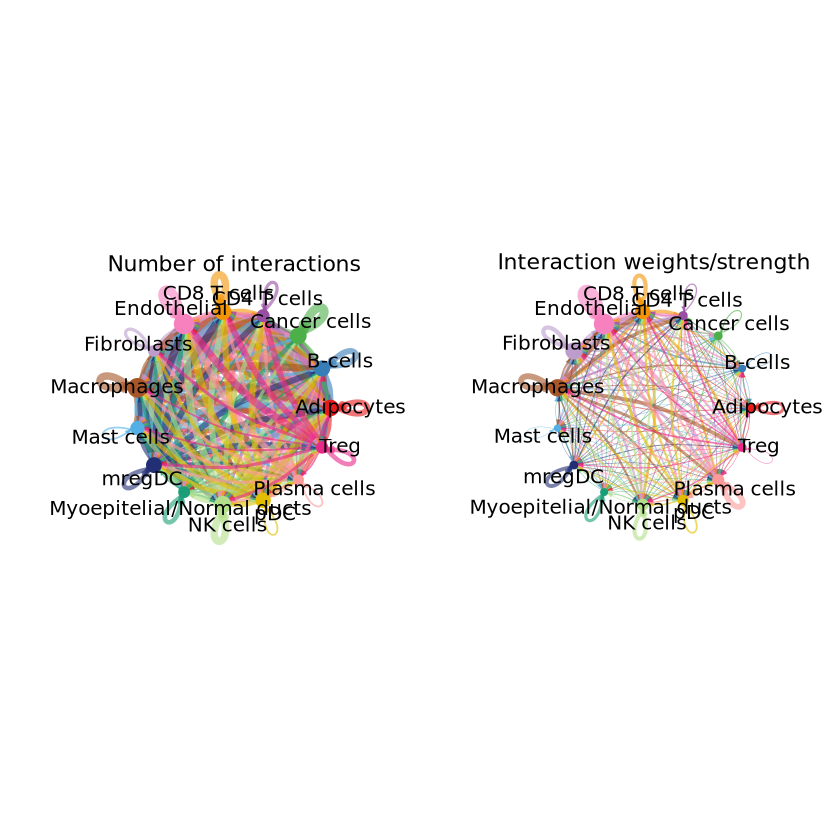

In [46]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = rowSums(cellchat@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = rowSums(cellchat@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

Do heatmap based on a single object 




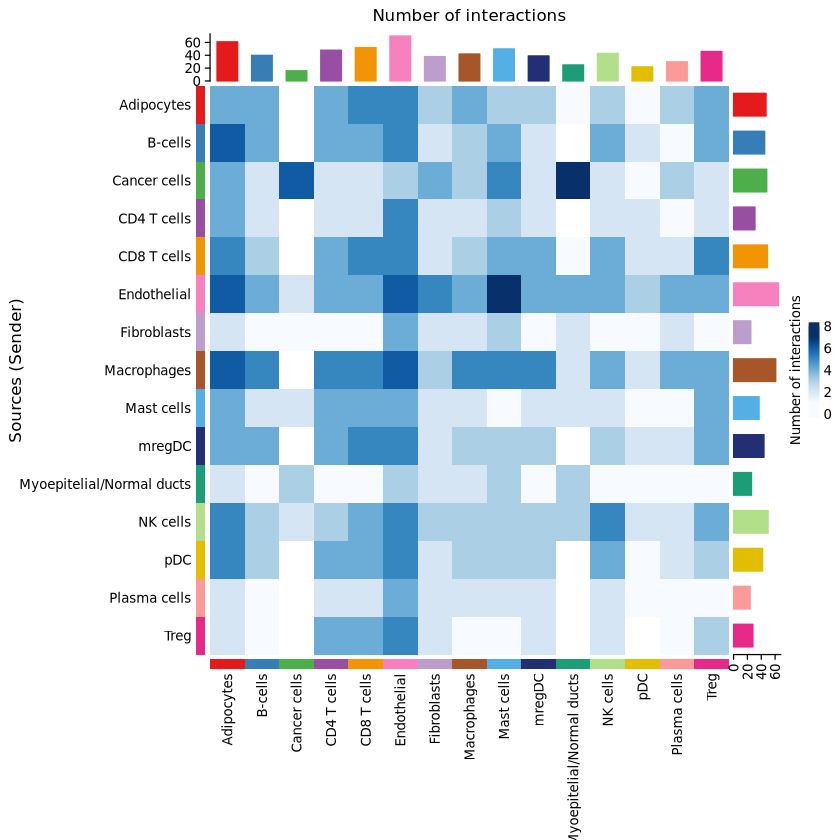

In [47]:
netVisual_heatmap(cellchat, measure = "count", color.heatmap = "Blues")

Do heatmap based on a single object 




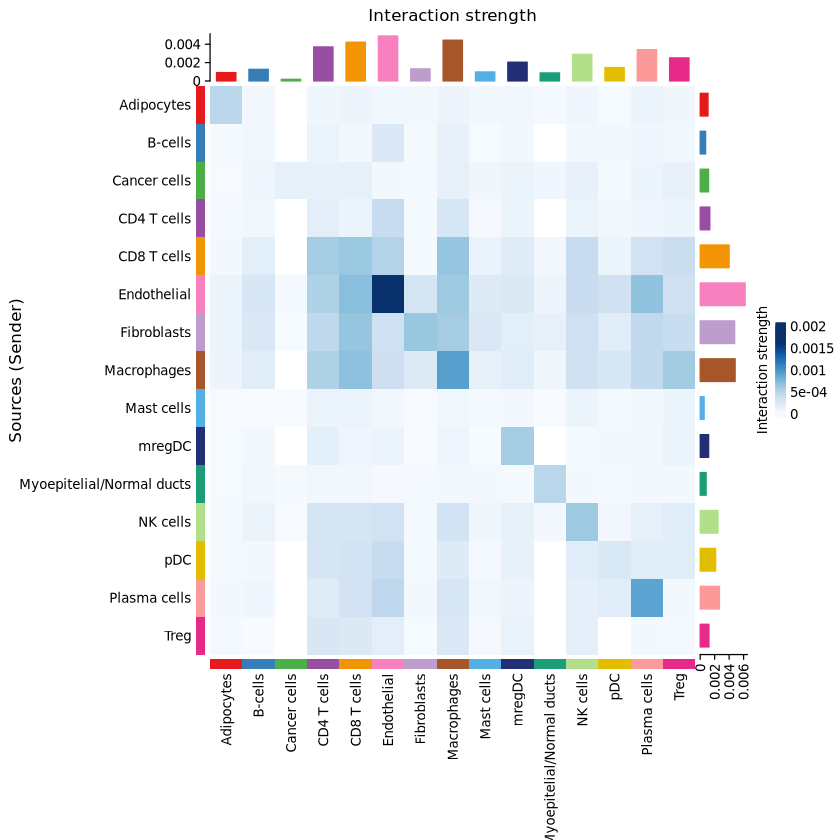

In [48]:
netVisual_heatmap(cellchat, measure = "weight", color.heatmap = "Blues")

In [50]:
cellchat

An object of class CellChat created from a single dataset 
 477 genes.
 111732 cells. 
CellChat analysis of spatial data! The input spatial locations are 
           x_cent y_cent
aaaagokl-1   1441    871
aaaaippd-1   1468    860
aaaajeja-1   1411    855
aaablpen-1   1449    858
aaaclnhj-1   1441    844
aaadfacg-1   1458    841

In [51]:
cellchat@netP

$pathways
 [1] "FN1"     "PECAM1"  "CD45"    "CCL"     "CLEC"    "SELL"    "SPP1"   
 [8] "CD86"    "LAMININ" "CDH"     "CXCL"    "EPHB"    "EDN"     "KIT"    
[15] "NCAM"    "EGF"    

$prob
, , FN1

                            Adipocytes      B-cells Cancer cells  CD4 T cells
Adipocytes                3.553437e-04 4.170029e-05            0 5.790315e-05
B-cells                   0.000000e+00 0.000000e+00            0 0.000000e+00
Cancer cells              0.000000e+00 5.146571e-05            0 9.042370e-05
CD4 T cells               0.000000e+00 0.000000e+00            0 0.000000e+00
CD8 T cells               0.000000e+00 1.484679e-04            0 4.396328e-04
Endothelial               5.151854e-05 1.718135e-04            0 3.794428e-04
Fibroblasts               8.847096e-05 2.270483e-04            0 4.376299e-04
Macrophages               4.034860e-05 1.364262e-04            0 3.690137e-04
Mast cells                0.000000e+00 0.000000e+00            0 7.279194e-05
mregDC                    0.000000e+00 0.000000e+00            0 0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.000000e+00            0 0.000000e+00
NK cells                  0.000000e+00 8.742863e-05            0 2.329426e-04
pDC                       0.000000e+00 0.000000e+00            0 2.226492e-04
Plasma cells              0.000000e+00 0.000000e+00            0 1.334360e-04
Treg                      0.000000e+00 0.000000e+00            0 2.242014e-04
                           CD8 T cells  Endothelial  Fibroblasts  Macrophages
Adipocytes                6.701056e-05 0.0000000000 0.0000355007 4.756945e-05
B-cells                   0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
Cancer cells              9.700027e-05 0.0000000000 0.0000000000 9.181623e-05
CD4 T cells               0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
CD8 T cells               4.511115e-04 0.0000000000 0.0000000000 2.414218e-04
Endothelial               4.464267e-04 0.0003131306 0.0002079208 2.960036e-04
Fibroblasts               6.424430e-04 0.0002784574 0.0006275554 5.536064e-04
Macrophages               4.604749e-04 0.0000000000 0.0001898246 4.238638e-04
Mast cells                8.555193e-05 0.0000000000 0.0000000000 0.000000e+00
mregDC                    0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
NK cells                  2.146771e-04 0.0000000000 0.0000000000 1.153739e-04
pDC                       2.014977e-04 0.0000000000 0.0000000000 0.000000e+00
Plasma cells              1.527764e-04 0.0000000000 0.0000000000 0.000000e+00
Treg                      2.120905e-04 0.0000000000 0.0000000000 0.000000e+00
                            Mast cells       mregDC Myoepitelial/Normal ducts
Adipocytes                3.407210e-05 5.041385e-05              2.113447e-05
B-cells                   0.000000e+00 0.000000e+00              0.000000e+00
Cancer cells              3.815870e-05 6.602248e-05              3.300161e-05
CD4 T cells               0.000000e+00 0.000000e+00              0.000000e+00
CD8 T cells               7.873771e-05 1.492334e-04              4.484443e-05
Endothelial               1.214973e-04 1.404207e-04              6.696310e-05
Fibroblasts               2.213502e-04 1.614182e-04              1.306803e-04
Macrophages               9.560652e-05 1.397529e-04              5.337034e-05
Mast cells                0.000000e+00 3.556665e-05              0.000000e+00
mregDC                    0.000000e+00 0.000000e+00              0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.000000e+00              0.000000e+00
NK cells                  5.028122e-05 1.185480e-04              2.917699e-05
pDC                       0.000000e+00 9.217114e-05              0.000000e+00
Plasma cells              0.000000e+00 4.479480e-05              0.000000e+00
Treg                      0.000000e+00 1.030503e-04              0.000000e+00
                              NK cells          pDC Pla

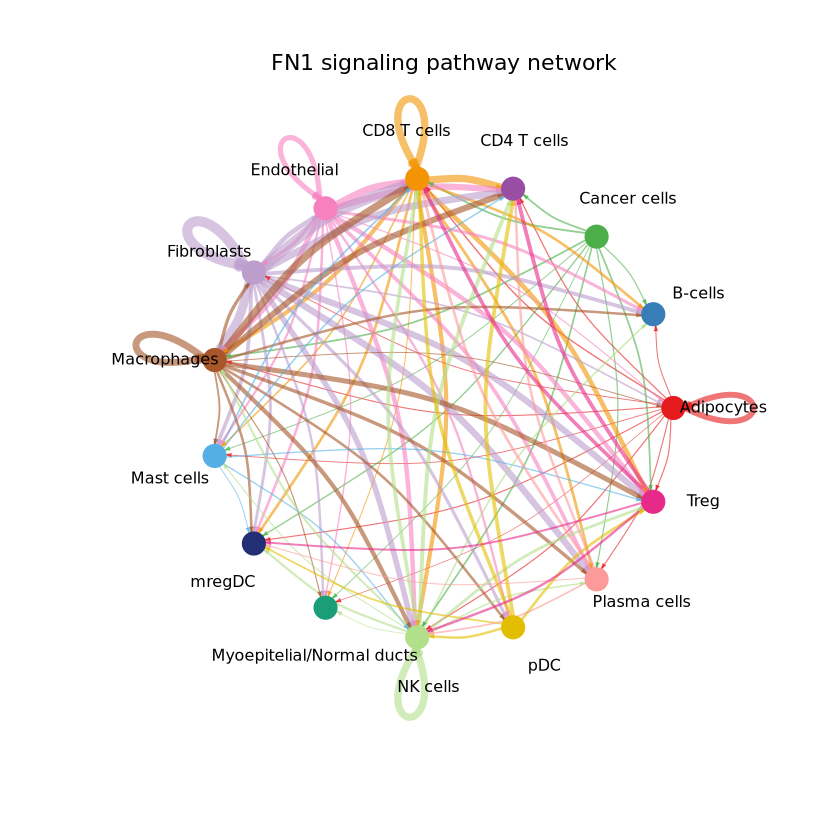

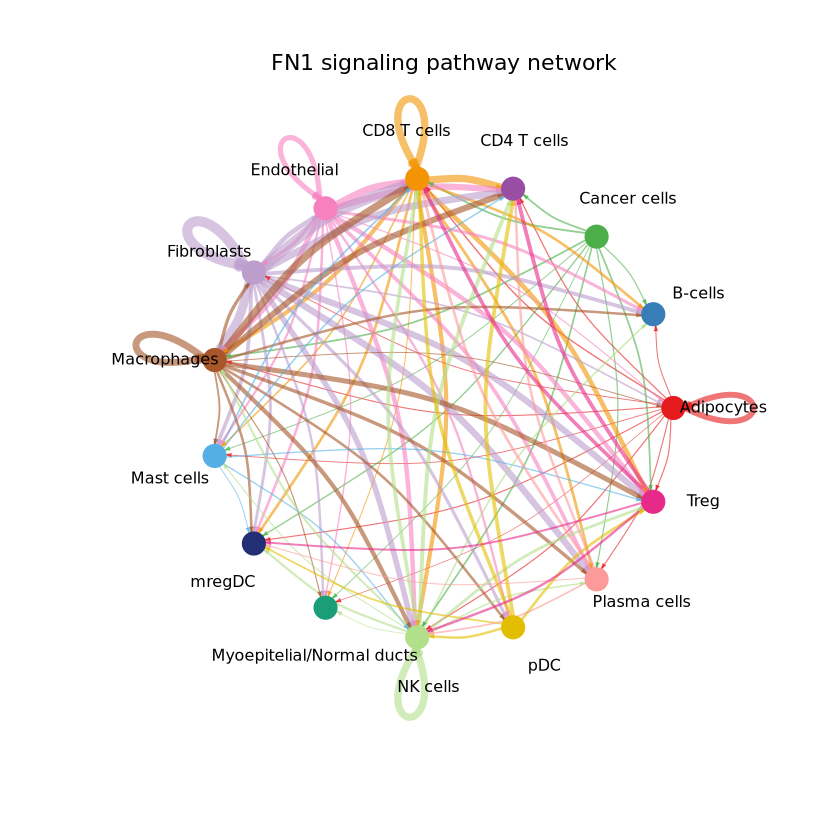

In [52]:
pathways.show <- c("FN1") 
# Circle plot
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")